In [19]:
# load and import all the required packages
import numpy as np
import matplotlib.pyplot as plt

# Eric Wang
## Nov 4, 2020

# HW2 Problem 3

## (3a)

Write a python code to evaluate the Lebesgue function
$$
L_n(x)=\sum^{n}_{j=0}\|\prod_{k=0,k\ne j}^{n}\frac{x-x_k}{x_j-x_k}\|
$$


In [37]:
def lebesguefn(x, xn):
    # we define a function called lebesguefn
    # with input value of x and xn
        # x will be the x coordinate value
        # xn will be the node
 
    l = 0
    # use for loop to run through the iteration
    for i in range(len(xn)): # assign i as the indicator variable
        # Assign the values to variable n
            # the values are the return of the product of the elements in array
        n = np.prod(x-xn[:i])*np.prod(x-xn[i+1:])
        # Assign the values to variable d
             # the values are the return of the product of the elements in array
        d = np.prod(xn[i]-xn[:i])*np.prod(xn[i]-xn[i+1:])
        l += np.abs(n/d)
    return l
    # return a value l, which is the value of lebesguq function at the x coordinate value

## (3b)

Consider the equidistributed points $x_j = −1 + j(2/n)$ for $j = 0,\dots,n$. Write a computer code that uses (a) to evaluate and plot $L_n(x)$ (evaluate $L_n(x)$ at a large number of points $\bar{x}_k$ to have a good plotting resolution) for $n = 4, 10, 20$. Estimate $\Lambda_n$ for these three values of $n$.

Lambda_n is equal to 2.20782, when n is equal 20
Lambda_n is equal to 29.8981, when n is equal 20
Lambda_n is equal to 10979.2, when n is equal 20


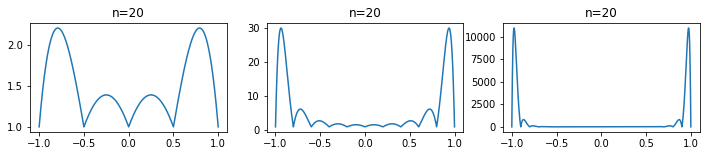

In [38]:
ns = (4,10,20)  # test
fig, ax = plt.subplots(1,len(ns),figsize=(12,2))  # figure

# use for loop to run through the iteration
for axis, z in zip(ax, ns): # assigning indicator variable
    # multiply by the evenly spaced values within the interval that is returned
    xn = -1 + (2/z)*np.arange(z+1)  
    # xn will be the nodes
    # multiply by the evenly spaced values within the interval that is returned
    xk = -1 + (2/1000)*np.arange(1001)  
    # xk will be the estimated value of the nodes
    
    # compute the lebesgue function
    # Assign the values to variable Ln
        # Ln will be the array consisted of zeros
    Ln = np.zeros(len(xk))
    for i in range(len(xk)): # i is the inidcator variable
        Ln[i] = lebesguefn(xk[i], xn)
    
    # Plot a plot for Ln
    axis.plot(xk, Ln)
    axis.set_title("n=%d"%n)
    
    # estimate the value of Lambda_n
    # Assign the values of maximum Ln to variable Lambda_n a
    Lambda_n = max(Ln)
    # print the result
    print("Lambda_n is equal to %g, when n is equal %d"%(Lambda_n, n))

# output the plot
plt.show()

# HW2 Problem 4

In [39]:
def barycentricweigths(xn): 
    # define a function called barycentricweights with input xn: the node
    # assigning the array of ones of the length of the input to weights
    weights = np.ones(len(xn))   
    # use nested for loop to run the iteration
    for i in range(1, len(xn)): # i is the indicator variable
        for j in range(i): # j is the indicator variable
            weights[j] = weights[j]/(xn[j]-xn[i])
        weights[i] = 1/np.prod(xn[i]-xn[:i]) # 1/ products of all elements in the array
    
    return weights # returns the barycentric weights as output

def barycentric(x, xn, yn, weights):
    #define a function called barycentric
    #with input value:
        # x = the x coordintae value
        # xn = the nodes
        # yn = nodes' value
        # weights = the barycentric weight
    # if else is used to distinguish the different condition
    if np.any(x==xn): # test if x coordinate is equal to xn
       return yn[x==xn]
    else:
        c = weights/(x-xn)
        return sum(c*yn)/sum(c)
    # This function returns a value of the interpolating polynomial at x as the output
    
    
    


Compare the results in problem 2 to test the implementation

In [40]:
xn = np.array([-2,0,1])  
# xn will be the node, which is an array
yn = np.array([0,1,-1])  
# yn will be the nodes' value, which is an array

weights = barycentricweigths(xn)  
# we assign the function of barycentricweight to a variable called weights


print(barycentric(-1, xn, yn, weights),'==',4/3) 
# print the result

1.3333333333333333 == 1.3333333333333333


The resulting value shows that it is consistent with the resulting value from problem 2.

- 

Use code in (a) to find $P_5(2)$ as an approximation of $f(2)$.

In [41]:
xn = np.array([0,0.25,0.52,0.74,1.28,1.5])
# xn will be the node, which is an array
yn = np.array([0,0.7070,1,0.7071,-0.7074,-1])
# yn will be the nodes' value, which is an array

weights = barycentricweigths(xn) 
# we assign the function of barycentricweight to a variable called weights

print('P_5(2) = %g'%(barycentric(2, xn, yn, weights)))
# print the result

P_5(2) = -2.34383
